# Data Loading

In [256]:
import pandas as pd
import numpy as np
import requests
import re
import json
import string 
import syllables
import matplotlib.pyplot as plt

In [141]:
df_token = pd.read_csv('../data/linkfree.csv')
df = pd.read_csv('../data/remove_links.csv')

In [142]:
df_token.rename(columns = {'linkfree':'tokenized'},inplace = True)

In [143]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [144]:
df_token

,type,tokenized
0,INFJ,"[['enfp', 'intj', 'moment', 'sportscenter', 't..."
1,ENTP,"[['im', 'finding', 'lack', 'post', 'alarming']..."
2,INTP,"[['good', 'one'], ['course', 'say', 'know', 't..."
3,INTJ,"[['dear', 'intp', 'enjoyed', 'conversation', '..."
4,ENTJ,"[['youre', 'fired'], ['thats', 'another', 'sil..."
...,...,...
8670,ISFP,"[['ixfp', 'always', 'think', 'cat', 'fi', 'dom..."
8671,ENFP,"[['soif', 'thread', 'already', 'exists', 'some..."
8672,INTP,"[['many', 'question', 'thing', 'would', 'take'..."
8673,INFP,"[['conflicted', 'right', 'come', 'wanting', 'c..."


In [145]:
def posts_split(posts):
    # split the posts column into 50 separate posts in a list
    posts_split = posts.split('|||')
    
    # split each of the 50 posts into a list of its words/URL links
    # so we have a list of 50 posts and each post is a list of the words/URL links
                
    return posts_split

In [146]:
df['posts_split'] = df['posts'].apply(posts_split)

In [147]:
df.posts_split[0]

['and intj moments   sportscenter not top ten plays   pranks',
 'What has been the most life-changing experience in your    On repeat for most of today.',
 'May the PerC Experience immerse you.',
 "The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390   ...',
 'Welcome and  Game. Set. Match.',
 "Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...",
 "Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by...",
 'All things in moderation. 

# Data Prep

## remove triple gang

In [149]:
def remove_gang(posts):
    for sentence in posts:
        sentence = sentence.replace('|||',' ')
    return posts

In [150]:
df['posts_split'] = df['posts_split'].apply(remove_gang)

# remove punctuation

In [131]:
import string

In [220]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [211]:
def remove_punc(posts):
    remove_punc = string.punctuation + '►•'
    post_ls = []
    for sentence in posts:
        for punctuation in remove_punc:
            sentence = sentence.replace(punctuation, ' ')
        post_ls.append(sentence)
    return post_ls

In [212]:
df['punc_free']=df['posts_split'].apply(lambda x: remove_punc(x))

In [219]:
df.punc_free[0]

['and intj moments   sportscenter not top ten plays   pranks',
 'What has been the most life changing experience in your    On repeat for most of today ',
 'May the PerC Experience immerse you ',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day  Rest in peace    ENFJ7  Sorry to hear of your distress  It s only natural for a relationship to not be perfection all the time in every moment of existence  Try to figure the hard times as times of growth  as   ',
 '84389  84390      ',
 'Welcome and  Game  Set  Match ',
 'Prozac  wellbrutin  at least thirty minutes of moving your legs  and I don t mean moving them while sitting in your same desk chair   weed in moderation  maybe try edibles as a healthier alternative   ',
 'Basically come up with three items you ve determined that each type  or whichever types you want to do  would more than likely use  given each types  cognitive functions and whatnot  when left by   ',
 'All things in moderation  

# 1. Readability of texts
> 206.835 - 1.015(total words/total sentences) -84.6(total syllables/total words)

In [215]:
len(df.punc_free[0])

24

In [229]:
def sentence_count(post):
    return len(post)

def word_count(post):
    count = 0
    for sentence in post:
        count += len(sentence.split())
    return count

def syll_count(X):
    count_syll = 0
    syll_count_ls = []
    for sentence in X:
        sentence = sentence.split()
        for word in sentence:
            count_syll +=  syllables.estimate(word)
        syll_count_ls.append(count_syll)
    return count_syll

In [222]:
df['sentence_count'] = df['punc_free'].apply(sentence_count)

In [223]:
df['syll_count'] = df['punc_free'].apply(syll_count)

In [230]:
df['word_count'] = df['punc_free'].apply(word_count)

In [231]:
df

,type,posts,posts_split,punc_free,sentence_count,syll_count,word_count
0,INFJ,and intj moments sportscenter not top ten pl...,[and intj moments sportscenter not top ten p...,[and intj moments sportscenter not top ten p...,24,870,579
1,ENTP,'I'm finding the lack of me in these posts ver...,['I'm finding the lack of me in these posts ve...,[ I m finding the lack of me in these posts ve...,41,1700,1252
2,INTP,"'Good one _____ course, to which I say I kn...","['Good one _____ course, to which I say I k...",[ Good one course to which I say I k...,42,1326,895
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","['Dear INTP, I enjoyed our conversation the ...",[ Dear INTP I enjoyed our conversation the ...,48,1699,1160
4,ENTJ,'You're fired.|||That's another silly misconce...,"['You're fired., That's another silly misconce...","[ You re fired , That s another silly misconce...",42,1509,1035
...,...,...,...,...,...,...,...
8670,ISFP,just because I always think of cats as Fi doms...,[just because I always think of cats as Fi dom...,[just because I always think of cats as Fi dom...,40,1276,864
8671,ENFP,'So...if this thread already exists someplace ...,['So...if this thread already exists someplace...,[ So if this thread already exists someplace...,50,2058,1470
8672,INTP,'So many questions when i do these things. I ...,['So many questions when i do these things. I...,[ So many questions when i do these things I...,49,1468,1023
8673,INFP,'I am very conflicted right now when it comes ...,['I am very conflicted right now when it comes...,[ I am very conflicted right now when it comes...,50,2556,1820


In [232]:
df_sum = df.groupby(['type']).sum()
df_sum

,sentence_count,syll_count,word_count
type,,,
ENFJ,8781,371212,261595
ENFP,31192,1287542,911708
ENTJ,10639,436903,301481
ENTP,32195,1278410,888326
ESFJ,1961,82694,58210
ESFP,2054,74960,52972
ESTJ,1819,72825,51306
ESTP,4075,156136,110955
INFJ,67138,2880796,2011043


In [233]:
def readability(X):
    X['readability'] = 206.835 - 1.015*(X['word_count']/X['sentence_count']) -84.6*(X['syll_count']/X['word_count'])
    return X

In [234]:
df_sum = df_sum.apply(lambda x: readability(x), axis=1)
df_sum

,sentence_count,syll_count,word_count,readability
type,,,,
ENFJ,8781.0,371212.0,261595.0,56.546897
ENFP,31192.0,1287542.0,911708.0,57.692947
ENTJ,10639.0,436903.0,301481.0,55.471192
ENTP,32195.0,1278410.0,888326.0,57.079301
ESFJ,1961.0,82694.0,58210.0,56.521877
ESFP,2054.0,74960.0,52972.0,60.942098
ESTJ,1819.0,72825.0,51306.0,58.122985
ESTP,4075.0,156136.0,110955.0,60.149141
INFJ,67138.0,2880796.0,2011043.0,55.243292


<BarContainer object of 16 artists>

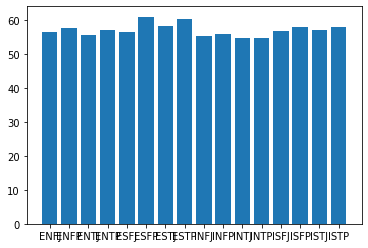

In [235]:
plt.bar(df_sum.index,height = df_sum['readability'])

# Median of word count

In [236]:
df_median = df.groupby(['type']).median()
df_median

,sentence_count,syll_count,word_count
type,,,
ENFJ,49.0,2063.0,1443.0
ENFP,49.0,1962.0,1399.0
ENTJ,49.0,1961.0,1360.0
ENTP,49.0,1937.0,1334.0
ESFJ,50.0,2064.5,1430.0
ESFP,47.5,1726.0,1187.0
ESTJ,50.0,1961.0,1396.0
ESTP,49.0,1859.0,1313.0
INFJ,49.0,2055.0,1428.5


<BarContainer object of 16 artists>

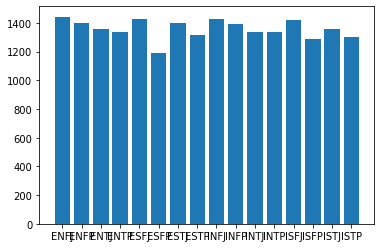

In [237]:
plt.bar(df_median.index,height = df_median['word_count'])

# 2. Average Word per Sentence

In [238]:
df['word_per_sentence'] = df['word_count']/df['sentence_count']

In [239]:
df_avg_word = df.groupby(['type']).mean()
df_avg_word

,sentence_count,syll_count,word_count,word_per_sentence
type,,,,
ENFJ,46.215789,1953.747368,1376.815789,29.715629
ENFP,46.210370,1907.469630,1350.678519,29.238861
ENTJ,46.056277,1891.354978,1305.112554,28.348172
ENTP,47.000000,1866.291971,1296.826277,27.608844
ESFJ,46.690476,1968.904762,1385.952381,29.457308
ESFP,42.791667,1561.666667,1103.583333,25.753124
ESTJ,46.641026,1867.307692,1315.538462,28.241495
ESTP,45.786517,1754.337079,1246.685393,27.080448
INFJ,45.672109,1959.725170,1368.056463,30.175291


<BarContainer object of 16 artists>

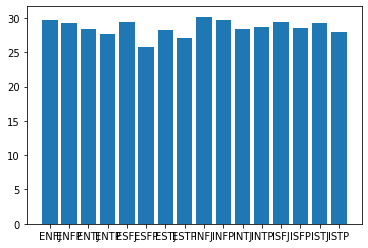

In [240]:
plt.bar(df_avg_word.index, height = df_avg_word['word_per_sentence'])

# 3. Average Word Length

In [241]:
def avg_word_length(posts_split):
    word_length_count = []
    count = 0
    for post in posts_split:
        count += len(post)  
    return count

In [242]:
df['word_length']=df['posts_split'].apply(avg_word_length)

In [243]:
df['avg_word_length'] = df['word_length']/df['word_count']

In [244]:
df.groupby(['type']).mean()

,sentence_count,syll_count,word_count,word_per_sentence,word_length,avg_word_length
type,,,,,,
ENFJ,46.215789,1953.747368,1376.815789,29.715629,7183.152632,5.225083
ENFP,46.210370,1907.469630,1350.678519,29.238861,7023.908148,5.206563
ENTJ,46.056277,1891.354978,1305.112554,28.348172,6908.584416,5.304935
ENTP,47.000000,1866.291971,1296.826277,27.608844,6818.013139,5.258751
ESFJ,46.690476,1968.904762,1385.952381,29.457308,7178.976190,5.187026
ESFP,42.791667,1561.666667,1103.583333,25.753124,5745.500000,5.196270
ESTJ,46.641026,1867.307692,1315.538462,28.241495,6825.794872,5.200668
ESTP,45.786517,1754.337079,1246.685393,27.080448,6467.943820,5.193381
INFJ,45.672109,1959.725170,1368.056463,30.175291,7172.021769,5.250446


In [250]:
df['punc_free'][0]

['and intj moments   sportscenter not top ten plays   pranks',
 'What has been the most life changing experience in your    On repeat for most of today ',
 'May the PerC Experience immerse you ',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day  Rest in peace    ENFJ7  Sorry to hear of your distress  It s only natural for a relationship to not be perfection all the time in every moment of existence  Try to figure the hard times as times of growth  as   ',
 '84389  84390      ',
 'Welcome and  Game  Set  Match ',
 'Prozac  wellbrutin  at least thirty minutes of moving your legs  and I don t mean moving them while sitting in your same desk chair   weed in moderation  maybe try edibles as a healthier alternative   ',
 'Basically come up with three items you ve determined that each type  or whichever types you want to do  would more than likely use  given each types  cognitive functions and whatnot  when left by   ',
 'All things in moderation  

# 3. Formality


In [253]:
import spacy

def formality_score(posts):
    nlp = spacy.load("en_core_web_sm")
    pos = ['NOUN','ADF','ADP','PRON','VERB','ADV','INTJ','DET']
    
    for sentences in posts:
        doc = nlp(sentences)
        pos_ls = []
        for token in doc:
            if token.pos_ in pos:
                pos_ls.append(token.pos_)

        noun_count = 0.0 #NOUN
        adj_count = 0.0 #ADJ
        prep_count = 0.0 # ADP
        article_count = 0.0 #DET
        pron_count = 0.0 #PRON
        verb_count = 0.0 #VERB
        adv_count = 0.0 #ADV
        interj_count = 0.0 #INTJ

        for pos in pos_ls:
            if pos == 'NOUN':
                noun_count += 1
            elif pos == 'ADJ':
                adj_count += 1
            elif pos == 'ADP':
                prep_count += 1
            elif pos == 'PRON':
                pron_count += 1
            elif pos == 'VERB':
                verb_count += 1
            elif pos == 'ADV':
                adv_count += 1
            elif pos == 'INTJ':
                interj_count += 1
            elif pos == 'DET':
                article_count += 1

        noun_freq = noun_count/df['word_count'][0]
        #print(noun_freq)
        adj_freq = adj_count/df['word_count'][0]
        prep_freq = prep_count/df['word_count'][0]
        pron_freq = pron_count/df['word_count'][0]
        verb_freq = verb_count/df['word_count'][0]
        adv_freq = adv_count/df['word_count'][0]
        interj_freq = interj_count/df['word_count'][0]
        article_freq = article_count/df['word_count'][0]

        formality = 0.5*(noun_freq+adj_freq+prep_freq+article_freq)-0.5*(pron_freq+verb_freq+adv_freq+interj_freq)+50
        
    return formality

In [257]:
df['formality'] = df['punc_free'].apply(lambda x: formality_score(x))

KeyboardInterrupt: 